# Using WineQT dataset

In [249]:
#Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.metrics import silhouette_score

In [250]:
#Loading the dataset

df = pd.read_csv('C:/Users/USER/Desktop/data science AFRICDSA/Datasets/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [251]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [252]:
#Checking for the shape of the data

df.shape

(1143, 13)

In [253]:
#Checking for nulls

df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

No Null Values

In [254]:
#Checking for duplicates

df.duplicated().sum()

0

No Duplicates

In [255]:
#Summary statistics of the dataset

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [256]:
#Checking the datatypes of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [257]:
#Dropping the ID column

df.drop(columns='Id', inplace=True)
df.shape

(1143, 12)

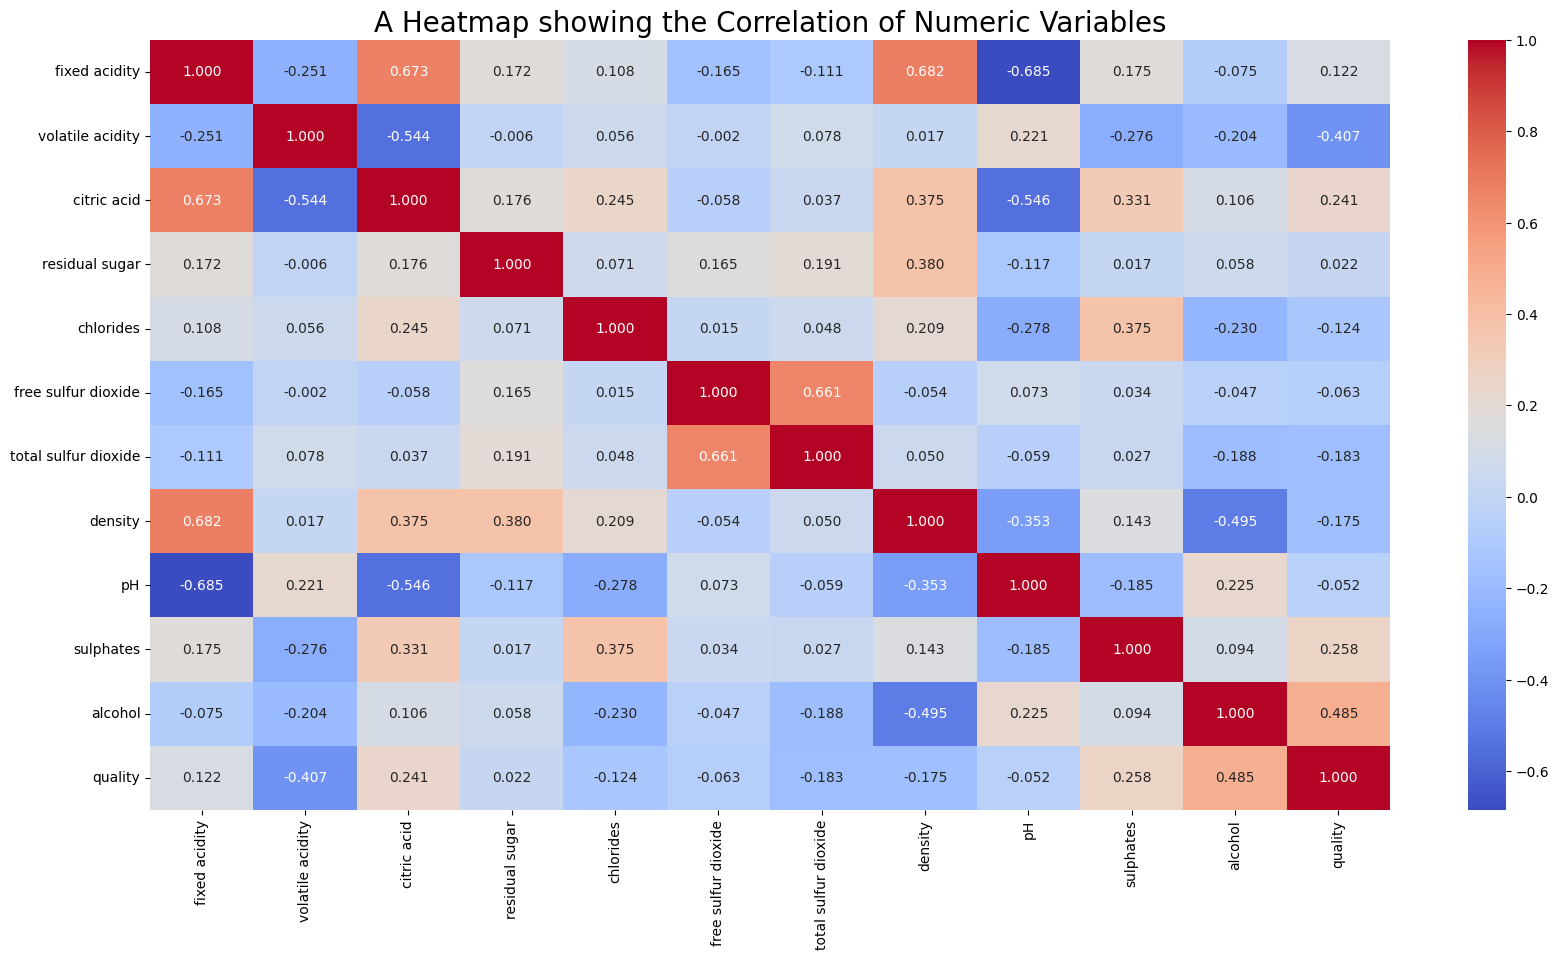

In [258]:
matrix = df.corr()
sns.heatmap(matrix, annot = True, fmt = '.3f', cmap = 'coolwarm')
plt.title('A Heatmap showing the Correlation of Numeric Variables', size = 20)
plt.show()

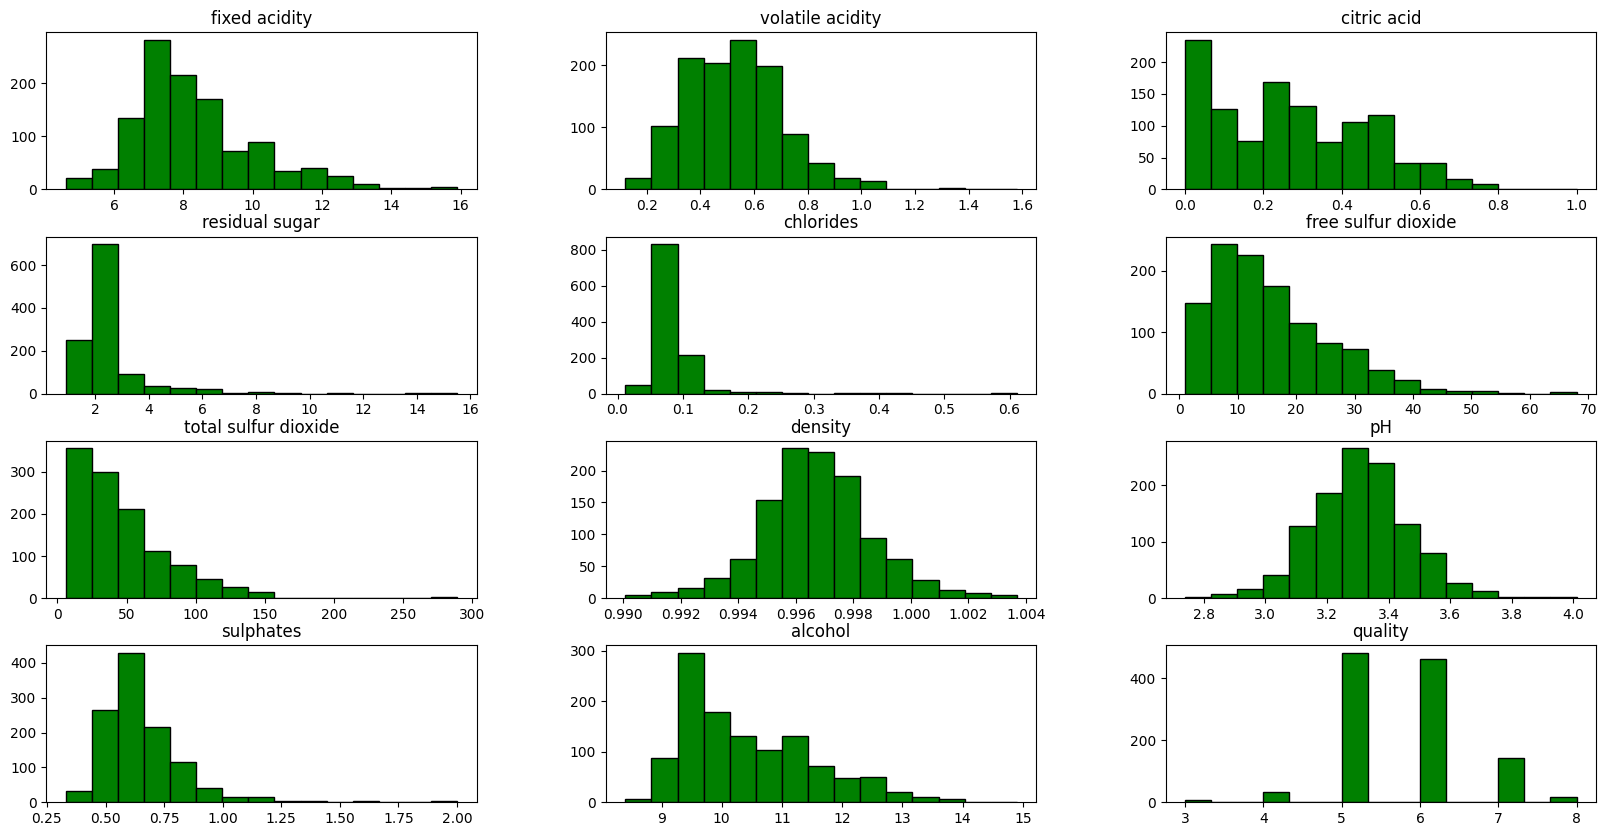

In [259]:
#Visualizations

#Histograms

plt.rcParams['figure.figsize'] = (20,10)
df.hist(grid = False, bins = 15, edgecolor = 'black', color = 'green')
plt.show()

- Fixed acidity is normally distributed 
- Volatile Acidity is normally distributed
- Citric Acid has a few outliers as well
- Residual, sulphate, free sulfur dioxide, total sulfur dioxide, and chloride columns are left skewed
- Density and pH are normally distributed
- Sulphates and Alcohol are left skewed 

<Axes: >

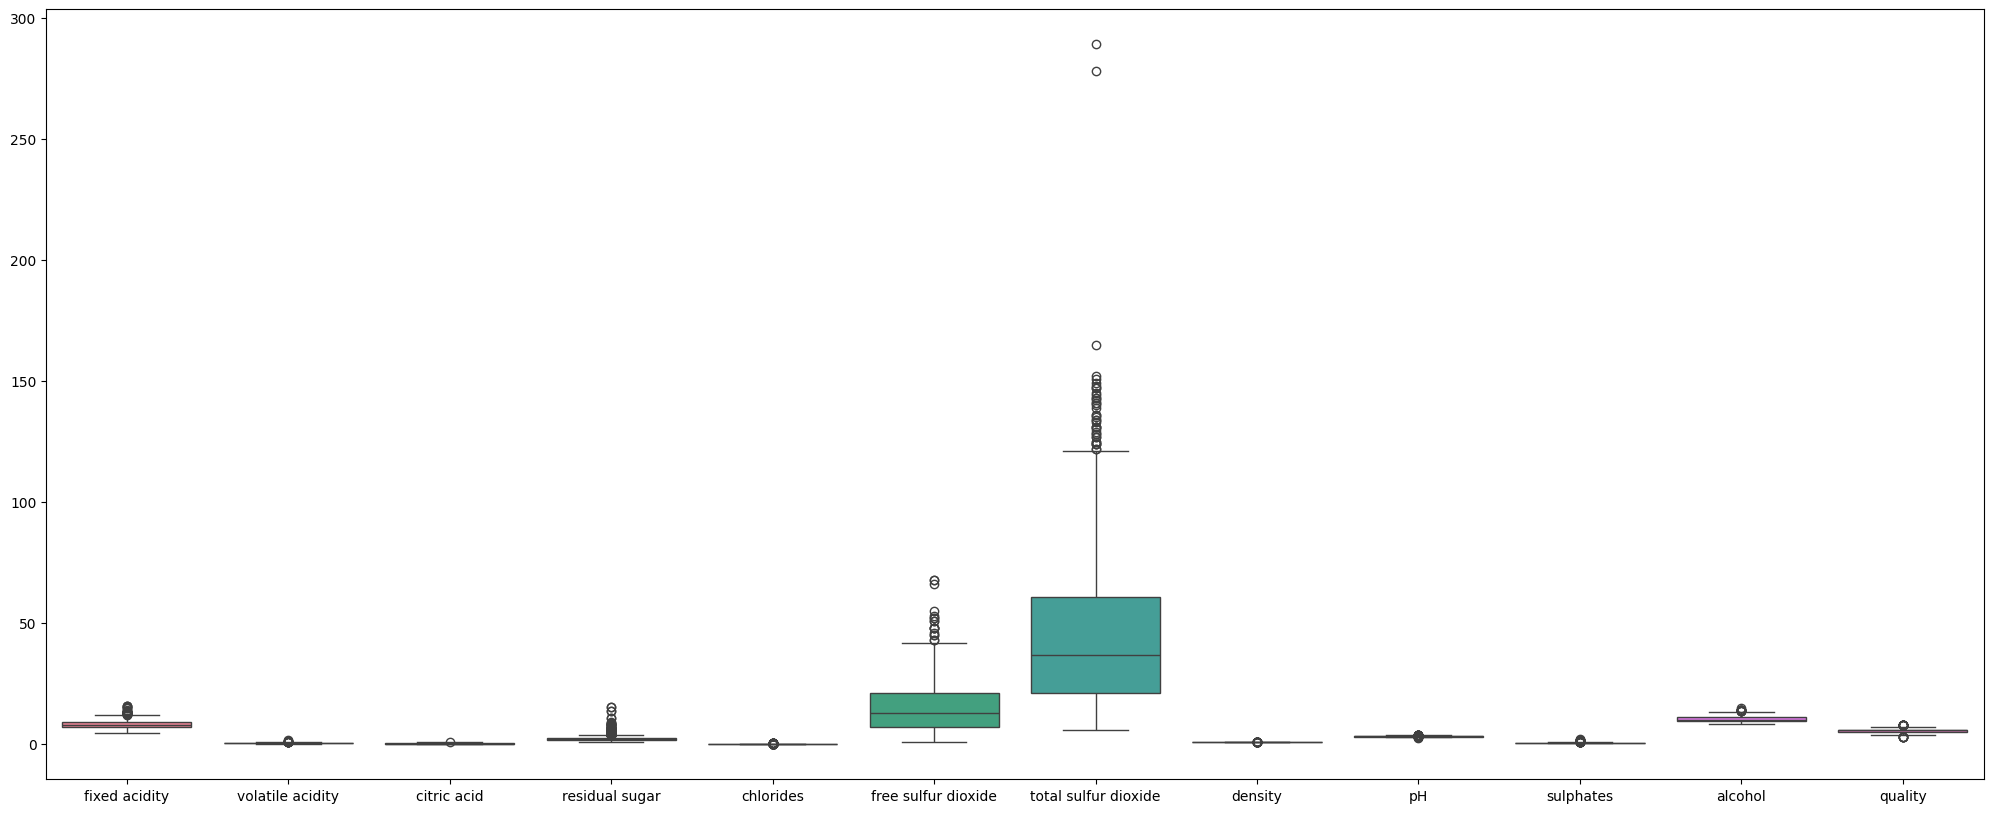

In [260]:
# Boxplots

plt.figure(figsize=(25,10))
sns.boxplot(df)

In [261]:
#Removing the outliers

df = df.copy()

for i in df.columns:
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - IQR*1.5
    upper_bound = Q3 + IQR*1.5
    
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    
df.shape

(787, 12)

In [262]:
#Scaling

scaler = StandardScaler()

df[['fixed acidity','free sulfur dioxide','total sulfur dioxide','pH']] = scaler.fit_transform(df[['fixed acidity','free sulfur dioxide','total sulfur dioxide','pH']])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.487434,0.70,0.00,1.9,0.076,-0.430253,-0.288326,0.9978,1.401571,0.56,9.4,5
1,-0.193085,0.88,0.00,2.6,0.098,1.242480,1.044314,0.9968,-0.985954,0.68,9.8,5
2,-0.193085,0.76,0.04,2.3,0.092,0.047671,0.519335,0.9970,-0.523852,0.65,9.8,5
3,2.308883,0.28,0.56,1.9,0.075,0.286633,0.761633,0.9980,-1.294021,0.58,9.8,6
4,-0.487434,0.70,0.00,1.9,0.076,-0.430253,-0.288326,0.9978,1.401571,0.56,9.4,5


In [263]:
# Feature Engineering

X = df[['alcohol','sulphates']]
X.head()

,alcohol,sulphates
0,9.4,0.56
1,9.8,0.68
2,9.8,0.65
3,9.8,0.58
4,9.4,0.56


In [264]:
# Hierarchical Clustering

linkage_matrix = linkage(X,'ward')
print(linkage_matrix[:5])

[[  0.   4.   0.   2.]
 [  2. 363.   0.   2.]
 [  3. 217.   0.   2.]
 [  5. 787.   0.   3.]
 [112. 236.   0.   2.]]


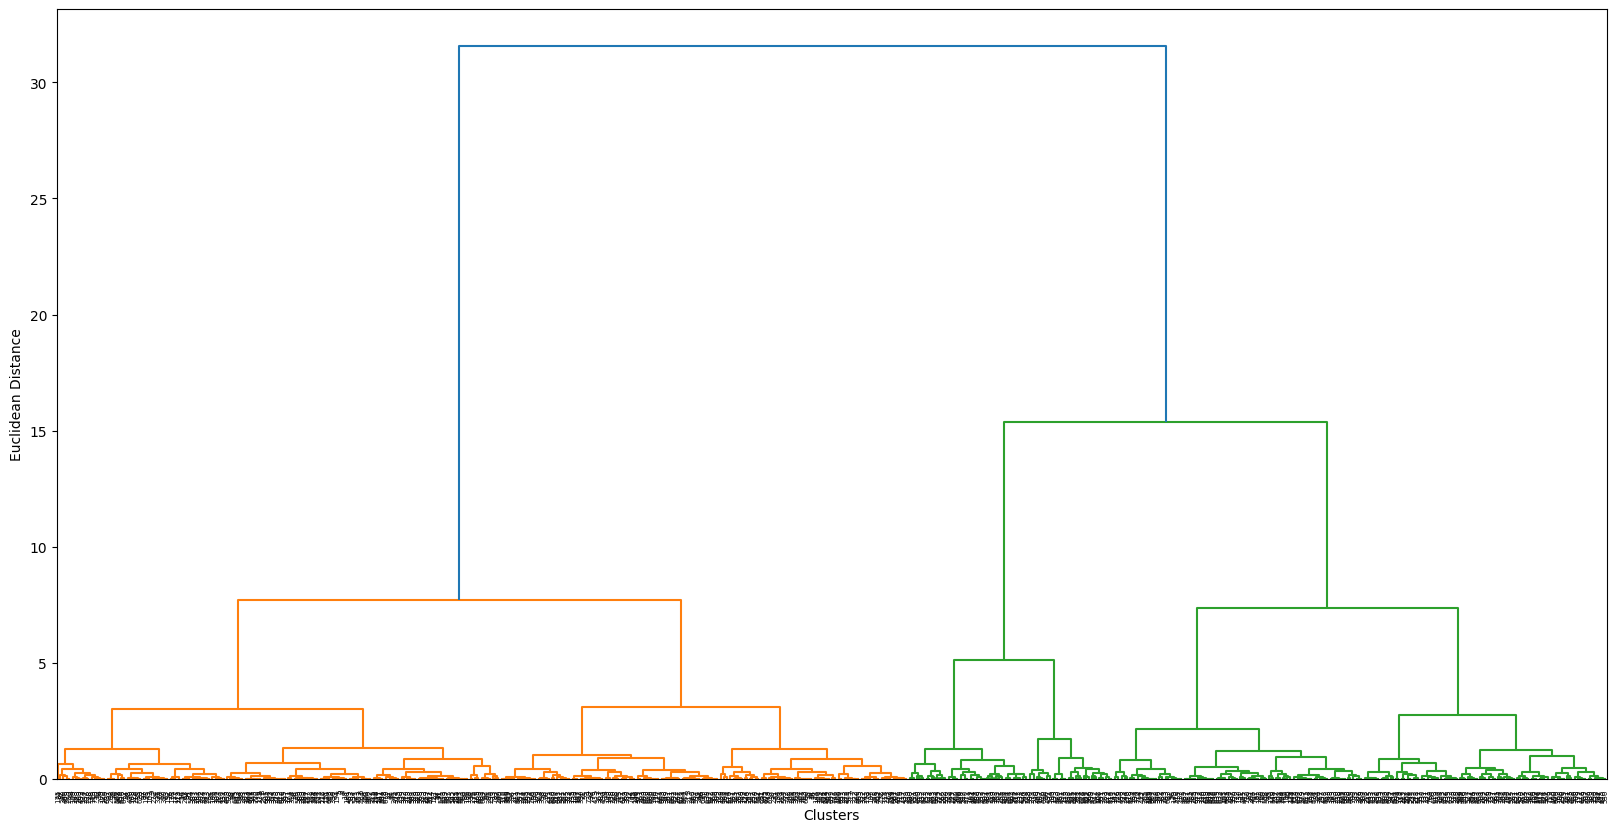

In [265]:
#Visualizing the matrix using a dendrogram

plt.figure(figsize=(20,10))
dendrogram(linkage_matrix)
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [266]:
#Creating the clusters

clusters = fcluster(linkage_matrix,2,criterion='maxclust')
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1
 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1
 1 2 1 1 1 1 1 1 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2
 2 1 1 2 1 2 2 2 2 2 2 1 2 1 1 1 2 1 2 1 2 2 1 2 2 2 1 2 1 1 2 1 1 2 1 1 1
 1 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 1 2 1 2 1 1 2 1 1 2 1 1 1 1 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 1 1 1 2 2 2 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 2 2 2
 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 1 2 2 2 2 2 2
 2 2 2 1 1 2 1 2 2 1 2 2 1 2 2 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2
 2 2 2 2 2 1 2 2 2 1 2 2 

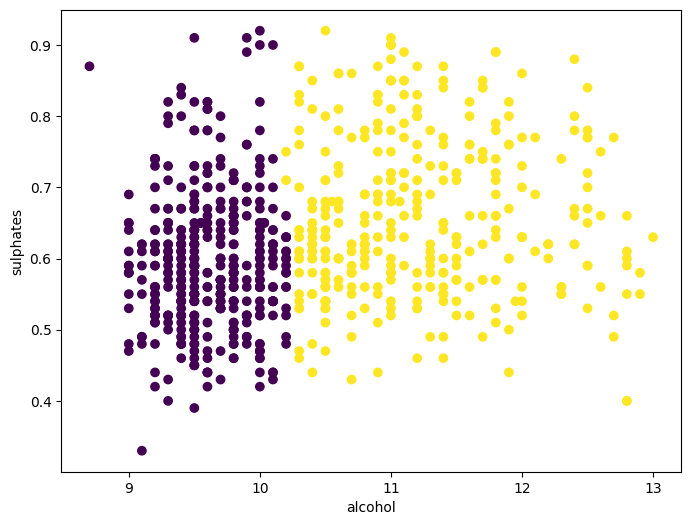

In [267]:
#Scatter plot to see the clusters

plt.figure(figsize=(8,6))
plt.scatter(X['alcohol'], X['sulphates'], c=clusters)
plt.xlabel('alcohol')
plt.ylabel('sulphates')
plt.show()

In [268]:
#Checking the accuracy

sil_score = silhouette_score(X,clusters)
print(f'The accuracy of the Hierarchical Cluster is : {round(sil_score,2)}')

The accuracy of the Hierarchical Cluster is : 0.6


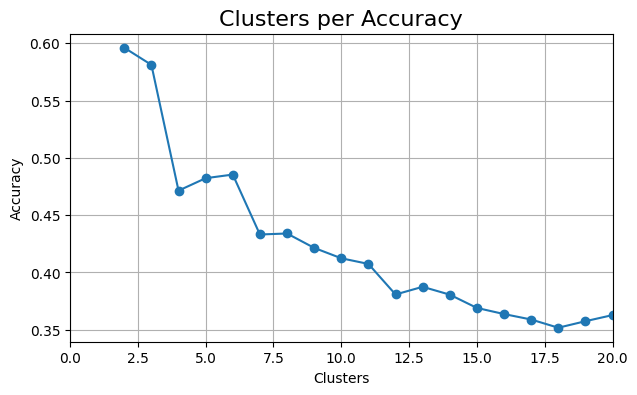

In [290]:
#Finding the ideal number of clusters between 2 and 20

clusterss = range(2,21)
accuracy = []

for i in clusterss:
    clusters = fcluster(linkage_matrix,i,criterion='maxclust')
    sil_score = silhouette_score(X,clusters)
    accuracy.append(sil_score)

plt.figure(figsize=(7,4))
plt.plot(clusterss, accuracy, marker = 'o')
plt.title('Clusters per Accuracy', size = 16)
plt.xlabel('Clusters')
plt.ylabel('Accuracy')
plt.xlim(0,20)
plt.grid(True)
plt.show()

The ideal number of clusters is 2 as it gives us the highest silhouette score of 0.6